In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:/Code/MlAlgo/dataSet/cell_samples.csv')

In [3]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [4]:
df.shape

(699, 11)

In [5]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [6]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [7]:
benignDf=df[df['Class']==2][0:200]
malignatDf=df[df['Class']==4][0:200]


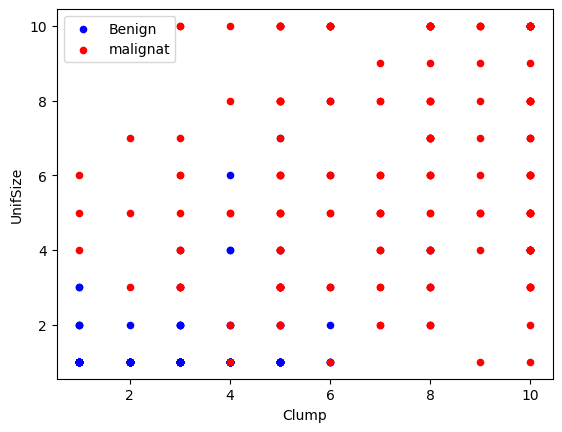

In [8]:
axes=benignDf.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')

malignant=malignatDf.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='malignat',ax=axes)



In [9]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
df2=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df2['BareNuc']=df2['BareNuc'].astype('int')

C:\Users\UTKARSH KISLAY\AppData\Local\Temp\ipykernel_25172\1234961598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BareNuc']=df2['BareNuc'].astype('int')


In [11]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [12]:
['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']

['ID',
 'Clump',
 'UnifSize',
 'UnifShape',
 'MargAdh',
 'SingEpiSize',
 'BareNuc',
 'BlandChrom',
 'NormNucl',
 'Mit',
 'Class']

In [13]:
featureDF=df2[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [14]:
featureDF.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [15]:
x=np.asarray(featureDF)
y=np.asarray(df2['Class'])



In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [17]:
X_train.shape

(546, 9)

In [18]:
from sklearn import svm


classifier=svm.SVC(kernel='linear',gamma='auto',C=12)
classifier.fit(X_train,y_train)

SVC(C=12, gamma='auto', kernel='linear')

In [19]:
y_Predict=classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred=y_Predict)

0.9635036496350365

In [20]:
from sklearn.metrics import classification_report


res=classification_report(y_test,y_Predict)
print(res)



              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

